Project 2
Tom Dai
UID: 118022796
README: https://github.com/nayeemmz/cmsc320Projects/blob/master/Project2/project2.md

Part 1)

In [ ]:
import sqlite3
import pandas
#sql file
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
#querying team, year, and the salary of the team, MLB is divided into two leagues, the national league and American league
AL_salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries WHERE  lgID == 'AL'  GROUP BY yearID"
NL_salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries WHERE  lgID == 'NL'  GROUP BY yearID"
#querying team, year, and the percentage of wins of the team
NL_win_query = "SELECT yearID, teamID, 100.0*W/(W+L) as winPercent From Teams WHERE  lgID == 'NL'  GROUP BY yearID"
AL_win_query = "SELECT yearID, teamID, 100.0*W/(W+L) as winPercent From Teams WHERE  lgID == 'AL'  GROUP BY yearID"
#SQL->Pandas
AL_s = pandas.read_sql(AL_salary_query, conn)
NL_s = pandas.read_sql(NL_salary_query, conn)
AL_w = pandas.read_sql(AL_win_query, conn)
NL_w = pandas.read_sql(NL_win_query, conn)
team_salaries = pandas.concat([AL_s,NL_s],ignore_index= True)
team_wins = pandas.concat([AL_w,NL_w],ignore_index= True)
#merging with outer join
df = pandas.merge(team_wins,team_salaries, how ='outer')
df


,yearID,teamID,winPercent,total_payroll
0,1901,BLA,51.127820,NaN
1,1902,BLA,36.231884,NaN
2,1903,BOS,65.942029,NaN
3,1904,BOS,61.688312,NaN
4,1905,BOS,51.315789,NaN
...,...,...,...,...
248,2010,ARI,40.123457,1.376267e+09
249,2011,ARI,58.024691,1.417338e+09
250,2012,ARI,50.000000,1.471498e+09
251,2013,ARI,50.000000,1.501399e+09


As you can see we have some missing values, but no payroll. We used an outer join, which means that data will be merged with corresponding keys, regardless if they have missing data. Since the creation of this table is a relationship between payroll and winning percentage, what we can do instead is only taking the data of both tables that interect, that is-being present in both tables (yearID and teamID). To fix this, all we need to do is simply perform an inner join instead of an outer join shown above.

In [ ]:
#note that we are now using inner join
intersect = team_salaries.merge(team_wins,how='inner',on=['yearID','teamID'])
intersect

,yearID,teamID,total_payroll,winPercent
0,1985,BAL,1.344011e+08,51.552795
1,1986,BAL,1.577164e+08,45.061728
2,1987,BAL,1.360887e+08,41.358025
3,1988,BAL,1.570498e+08,33.540373
4,1989,BAL,1.887717e+08,53.703704
5,1990,BAL,2.371971e+08,47.204969
6,1991,BAL,3.350988e+08,41.358025
7,1992,BAL,4.386076e+08,54.938272
8,1993,BAL,4.813734e+08,52.469136
9,1994,BAL,4.918558e+08,56.250000


As you can see, the draw back is that we lose a lot of data that does not intersect. One method we can do to combat this is to use linear regression and estimate our missing values, but as you will see at the end, we probably cannot use it in this case to estimate missing payroll.

The table above has some problems with the join/merge, so here is another table that uses the sql join to fix.

In [ ]:
merge_query= """
SELECT Salaries.yearID, Salaries.teamID, Teams.W, Teams.L, SUM(Salaries.salary) AS total_payroll
FROM Salaries
INNER JOIN Teams ON Salaries.yearID = Teams.yearID AND Salaries.teamID = Teams.teamID
WHERE Teams.lgID = 'AL'
GROUP BY Salaries.yearID, Salaries.teamID, Teams.W, Teams.L
"""
intersect = pandas.read_sql(merge_query, conn)
intersect['winPercent']= 100*intersect['W']/ (intersect['W']+intersect['L'])
intersect

,yearID,teamID,W,L,total_payroll,winPercent
0,1985,BAL,83,78,11560712.0,51.552795
1,1985,BOS,81,81,10897560.0,50.000000
2,1985,CAL,90,72,14427894.0,55.555556
3,1985,CHA,85,77,9846178.0,52.469136
4,1985,CLE,60,102,6551666.0,37.037037
...,...,...,...,...,...,...
417,2014,OAK,88,74,72408400.0,54.320988
418,2014,SEA,87,75,92531100.0,53.703704
419,2014,TBA,77,85,72689100.0,47.530864
420,2014,TEX,67,95,112255059.0,41.358025


Part 2:

Problem 2:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='yearID', ylabel='total_payroll'>

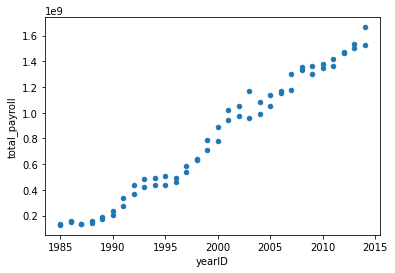

In [ ]:
team_salaries.plot(x='yearID',y='total_payroll',kind='scatter')

Question 1: Shown by the plot, the central tendency of the scatterplot shows us that over time, overall payroll for baseball has increased. The spread is very minimal, meaning that the relationship between the payroll and years is strongly correlated. We can see that payroll and the year have a positive linear relationship.

<Axes: xlabel='yearID', ylabel='mean_payroll'>

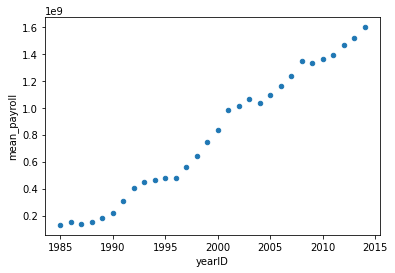

In [ ]:
import numpy as np
years = team_salaries['yearID'].unique()
means = []
#creating mean pay for each year
for year in years:
  df = team_salaries[team_salaries['yearID']==year]
  means.append(df['total_payroll'].mean())
pandas.DataFrame({'yearID' : years, 'mean_payroll' :means}).plot(x='yearID',y='mean_payroll',kind='scatter') 


Problem 3: As you can see, the mean payroll plotted against time shows that overtime, the payroll was increasing linearly.

Problem 4:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


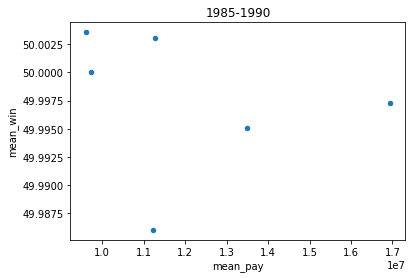

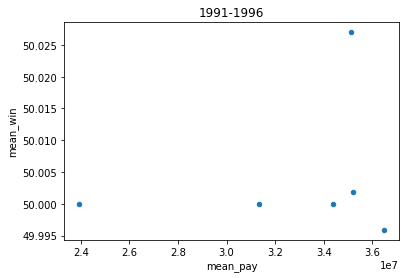

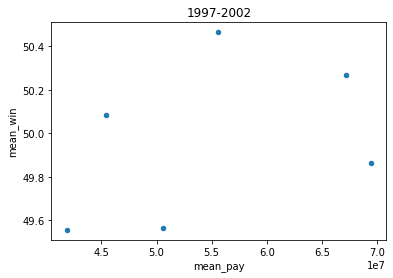

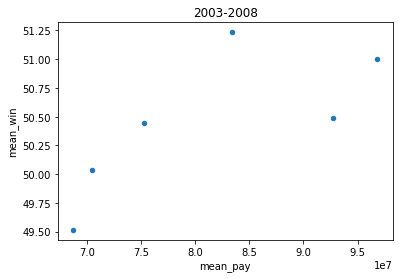

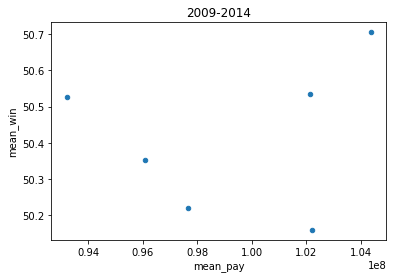

In [ ]:
#we created a new column to cut our dataframe into 5 equal parts
intersect['period'] = pandas.cut(intersect['yearID'], bins=5, labels=['first', 'second', 'third', 'fourth', 'fifth'])
#for each bin, we will plot the mean pay vs the year
for period in ['first', 'second', 'third', 'fourth', 'fifth']:
  df = intersect[intersect['period'] == period ]
  mean_payroll =[]
  mean_win=[]
  years = df['yearID'].unique()
  title = str(years[0])+'-'+str(years[-1])
  for year in years:
    mean_payroll.append(df[df['yearID']==year]['total_payroll'].mean())
    mean_win.append(df[df['yearID']==year]['winPercent'].mean())
  pandas.DataFrame(
      {
          'mean_win' : mean_win,
          'mean_pay': mean_payroll
      }
  ).plot(y='mean_win',x='mean_pay', kind='scatter',title= title)

Question 2: We can see in the plot above that there is not much correlation between the winning percentage and the pay that a team recieves. That means that a very good player could be bought for very cheap.

Part 3:

Problem 5:

In [ ]:
years = intersect['yearID'].unique()
mean_pay = {}
std_pay = {}
#getting the mean_pay and standard deviation pay for that year
for year in years:
  mean_pay[year] = intersect[intersect['yearID']==year]['total_payroll'].mean()
  std_pay[year] = intersect[intersect['yearID']==year]['total_payroll'].std()

temp = []
#getting the standard pay
for index, row in intersect.iterrows():
  year = row['yearID']
  pay = row['total_payroll']
 
  temp.append( (pay- mean_pay[year]) / std_pay[year] )


intersect['std_pay']= temp
intersect

,yearID,teamID,W,L,total_payroll,winPercent,period,std_pay
0,1985,BAL,83,78,11560712.0,51.552795,first,0.682229
1,1985,BOS,81,81,10897560.0,50.000000,first,0.451476
2,1985,CAL,90,72,14427894.0,55.555556,first,1.679905
3,1985,CHA,85,77,9846178.0,52.469136,first,0.085633
4,1985,CLE,60,102,6551666.0,37.037037,first,-1.060738
...,...,...,...,...,...,...,...,...
417,2014,OAK,88,74,72408400.0,54.320988,fifth,-0.752784
418,2014,SEA,87,75,92531100.0,53.703704,fifth,-0.243271
419,2014,TBA,77,85,72689100.0,47.530864,fifth,-0.745676
420,2014,TEX,67,95,112255059.0,41.358025,fifth,0.256146


Problem 6:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


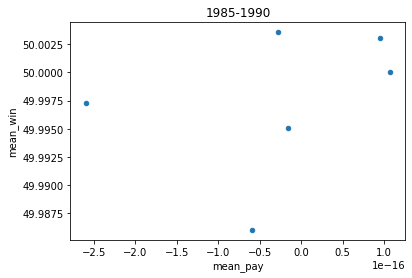

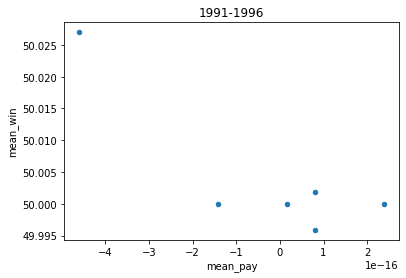

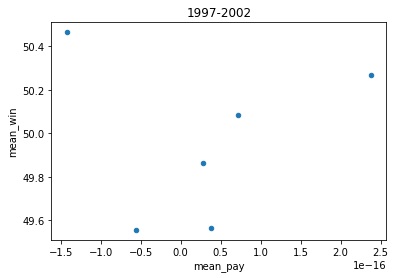

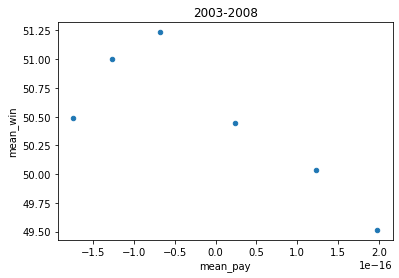

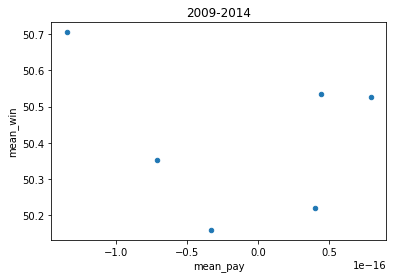

In [ ]:
#same thing as Problem 4, but instead of using mean pay we are using standard pay
intersect['period'] = pandas.cut(intersect['yearID'], bins=5, labels=['first', 'second', 'third', 'fourth', 'fifth'])
for period in ['first', 'second', 'third', 'fourth', 'fifth']:
  df = intersect[intersect['period'] == period ]
  mean_payroll =[]
  mean_win=[]
  years = df['yearID'].unique()
  title = str(years[0])+'-'+str(years[-1])
  for year in years:
    mean_payroll.append(df[df['yearID']==year]['std_pay'].mean())
    mean_win.append(df[df['yearID']==year]['winPercent'].mean())
  pandas.DataFrame(
      {
          'mean_win' : mean_win,
          'mean_pay': mean_payroll
      }
  ).plot(y='mean_win',x='mean_pay', kind='scatter',title= title)

Question 3: The plot from problem 4 was simply plotted the mean pay vs the mean win while the plot from problem 6 plotted the standard pay vs the mean win. The standard pay shows how far the payroll is from the average payroll of that year. That is way it looks more distributed towards the left and right vs the line for the average payroll

Problem 7:

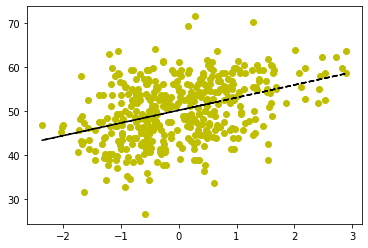

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = intersect['std_pay']
y = intersect['winPercent']
#creating and plotting our regression line
coef =np.polyfit(intersect['std_pay'], intersect['winPercent'], deg=1)
poly = np.poly1d(coef)
plt.plot(x,y, 'yo', x, poly(x), '--k')

Problem 8:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


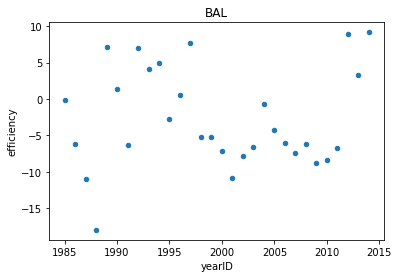

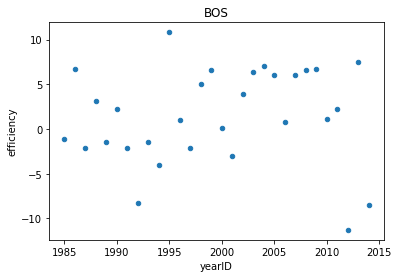

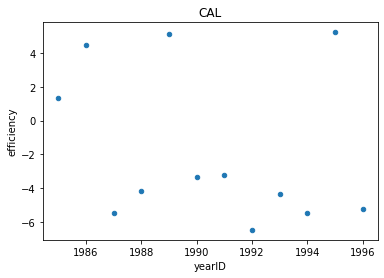

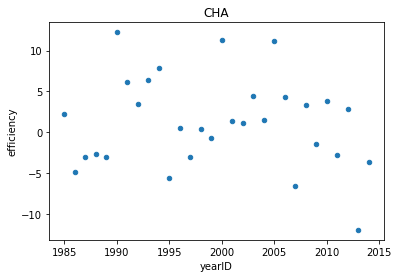

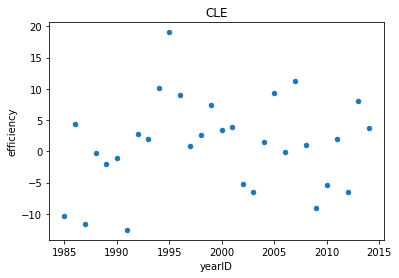

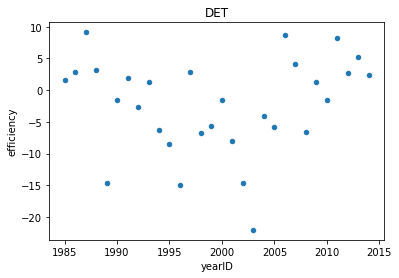

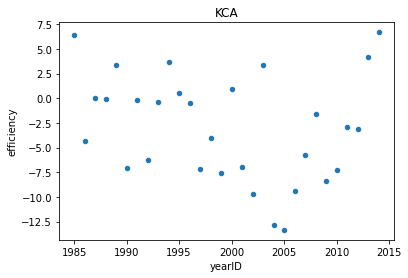

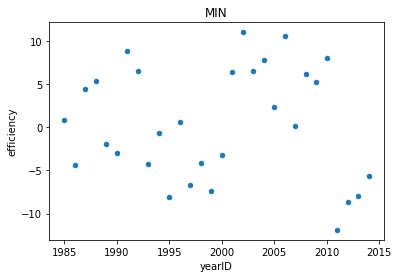

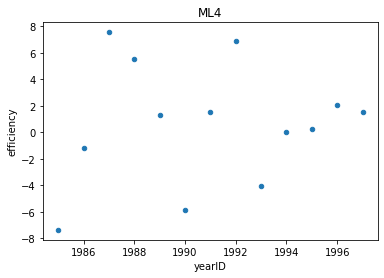

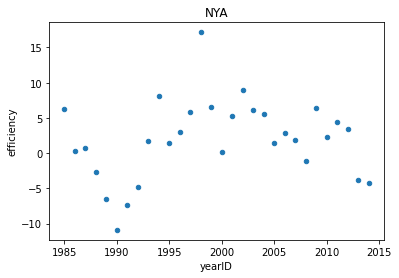

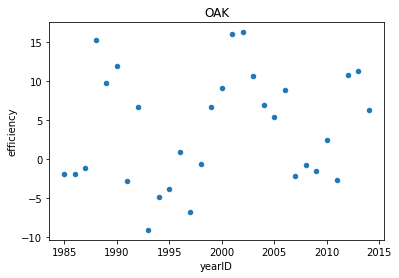

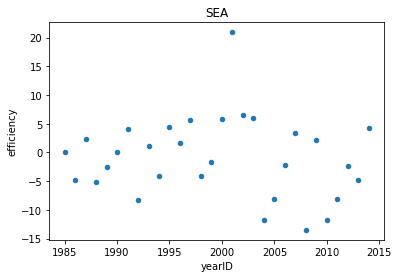

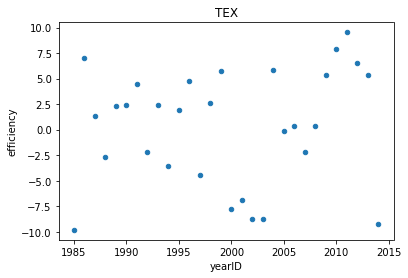

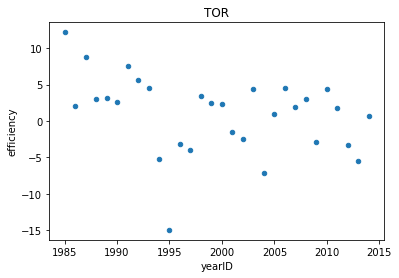

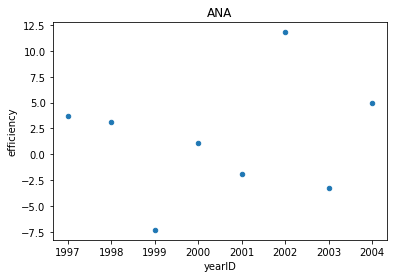

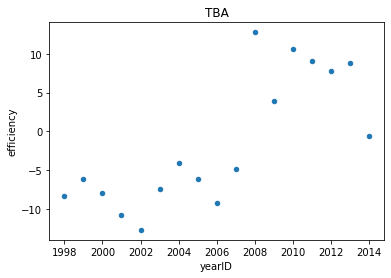

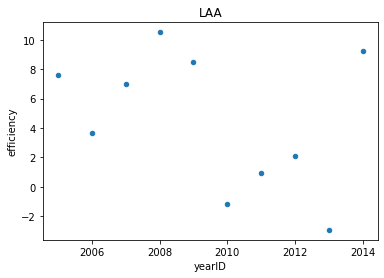

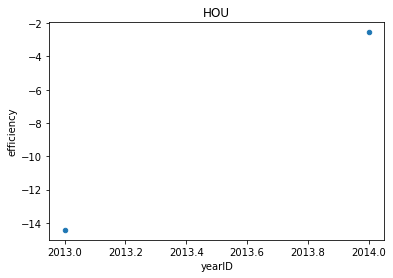

In [ ]:
#creating the columns for estimated win percentage and the efficiency score
intersect['estimated_win'] = 50 + 2.5*intersect['std_pay']
intersect['efficiency'] = intersect['winPercent']- intersect['estimated_win']
#i decided to plot each team available in the dataframe
for team in intersect['teamID'].unique():
  df = intersect[intersect['teamID']==team]
  df.plot(x='yearID',y='efficiency',title=team,kind='scatter')

For the ATL team, before 1991, the efficiency score of their players were not good. however after 1991, the efficiency score was above 10 points of their expected ability.

Question 4:
Looking back at Questions 2 and three, we can see forshadowing of this-, it is clear that certain teams are outperforming what is expected of them for their cost. Many teams like Oakland, seem to be exploiting that- getting undervalued players on the team and winning games with the most cost effective players. Oakland, exploting the strategy to buy up these undervalued players of course, had high efficiencies.